In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


target=[1,2,3]
feature=[3,4]
names={'0':'setosa','1':'versicolor','2':'virginica'}

feature=[f-1 for f in feature]
feature.append(-1)

df=pd.read_excel("Proj1DataSet.xlsx")

scaler=StandardScaler()
# add offset and drop species to get feature variables fv or X
species=df.species
df.drop(columns='species',inplace=True)

# scale data
df_scaled=scaler.fit_transform(df)
df = pd.DataFrame(df_scaled, columns=df.columns)


# add offset and drop species to get feature variables fv or X
df=df.assign(species=species.values.tolist())
df=df.assign(offset=[1]*df.shape[0])


needed_features = [df.columns[x] for x in feature ]

class_size=df.loc[df.species==df.species.unique()[0]].shape[0]

# target vector ... order matters
if target[0]==1:
    t=[0]*class_size + [1]*(df.shape[0]-class_size)
elif target[0]==2:
    t=[1]*class_size + [0]*class_size +[1]*class_size
elif target[0]==3:
    t= [1]*(df.shape[0]-class_size)+ [0]*class_size



In [14]:
# feature vectors fv or X extracted from dataframe
fv=df[needed_features].values.tolist()
fv

[[-1.3402265266227624, -1.3154442950077403, 1.0],
 [-1.3402265266227624, -1.3154442950077403, 1.0],
 [-1.3970639535363654, -1.3154442950077403, 1.0],
 [-1.2833890997091593, -1.3154442950077403, 1.0],
 [-1.3402265266227624, -1.3154442950077403, 1.0],
 [-1.1697142458819532, -1.0521799264271385, 1.0],
 [-1.3402265266227624, -1.1838121107174393, 1.0],
 [-1.2833890997091593, -1.3154442950077403, 1.0],
 [-1.3402265266227624, -1.3154442950077403, 1.0],
 [-1.2833890997091593, -1.4470764792980408, 1.0],
 [-1.2833890997091593, -1.3154442950077403, 1.0],
 [-1.226551672795556, -1.3154442950077403, 1.0],
 [-1.3402265266227624, -1.4470764792980408, 1.0],
 [-1.5107388073635717, -1.4470764792980408, 1.0],
 [-1.4539013804499687, -1.3154442950077403, 1.0],
 [-1.2833890997091593, -1.0521799264271385, 1.0],
 [-1.3970639535363654, -1.0521799264271385, 1.0],
 [-1.3402265266227624, -1.1838121107174393, 1.0],
 [-1.1697142458819532, -1.1838121107174393, 1.0],
 [-1.2833890997091593, -1.1838121107174393, 1.0],
 

In [15]:
#Xt: transpose matrix X
Xt=np.array(fv).transpose()
Xt

array([[-1.34022653e+00, -1.34022653e+00, -1.39706395e+00,
        -1.28338910e+00, -1.34022653e+00, -1.16971425e+00,
        -1.34022653e+00, -1.28338910e+00, -1.34022653e+00,
        -1.28338910e+00, -1.28338910e+00, -1.22655167e+00,
        -1.34022653e+00, -1.51073881e+00, -1.45390138e+00,
        -1.28338910e+00, -1.39706395e+00, -1.34022653e+00,
        -1.16971425e+00, -1.28338910e+00, -1.16971425e+00,
        -1.28338910e+00, -1.56757623e+00, -1.16971425e+00,
        -1.05603939e+00, -1.22655167e+00, -1.22655167e+00,
        -1.28338910e+00, -1.34022653e+00, -1.22655167e+00,
        -1.22655167e+00, -1.28338910e+00, -1.28338910e+00,
        -1.34022653e+00, -1.28338910e+00, -1.45390138e+00,
        -1.39706395e+00, -1.34022653e+00, -1.39706395e+00,
        -1.28338910e+00, -1.39706395e+00, -1.39706395e+00,
        -1.39706395e+00, -1.22655167e+00, -1.05603939e+00,
        -1.34022653e+00, -1.22655167e+00, -1.34022653e+00,
        -1.28338910e+00, -1.34022653e+00,  5.35408562e-0

In [16]:
#XtX: matrix multiplication
XtX=np.matmul(Xt,fv)
XtX

array([[ 1.50000000e+02,  1.44429815e+02, -1.27897692e-13],
       [ 1.44429815e+02,  1.50000000e+02, -6.39488462e-14],
       [-1.27897692e-13, -6.39488462e-14,  1.50000000e+02]])

In [17]:
#XtX_inv: inverse of XtX
XtX_inv=np.linalg.inv(XtX)
XtX_inv

array([[ 9.14618184e-02, -8.80654232e-02,  4.04404887e-17],
       [-8.80654232e-02,  9.14618184e-02, -3.60965777e-17],
       [ 4.04404887e-17, -3.60965777e-17,  6.66666667e-03]])

In [18]:
np.matmul(XtX_inv,XtX)

array([[ 1.00000000e+00, -1.23906478e-15,  1.93517441e-30],
       [ 9.06717178e-16,  1.00000000e+00, -1.68865538e-30],
       [-2.83496888e-31,  5.54667824e-32,  1.00000000e+00]])

In [19]:
Xfin=Xt.dot(t)
Xfin

array([ 65.2493661 ,  62.74467451, 100.        ])

In [20]:
w= np.matmul(XtX_inv,Xfin)
w=XtX_inv.dot(Xfin)
w

array([ 0.44218936, -0.00747102,  0.66666667])

In [23]:
misclassed=0
for x in range(len(fv)):
    # first class <= 0.5, second class >= 0.5
    res=w.dot(fv[x])
    if ((res<0.5) and (t[x]!=0)) or ((res>=0.5) and (t[x]!=1)):
        misclassed+=1
misclassed

TypeError: list.remove() takes exactly one argument (0 given)

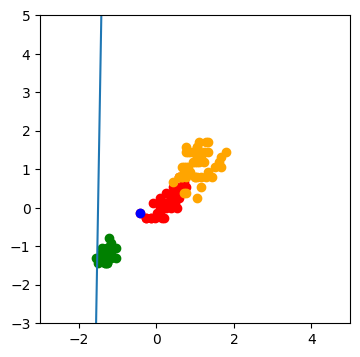

In [22]:

# plot 
if len(needed_features)==3:
    plt.figure(figsize=(4,4))
    ax=plt.axes()

    # 2d
    x=np.linspace(-9, 9, 1000)
    # function
    plt.plot(x,-1*(w[0]*x + w[2])/w[1])

    
    c1_start=(target[0]-1)*class_size
    c1_stop=c1_start+class_size
    c1_plot=[x for x in fv[c1_start:c1_stop]]
    for point in c1_plot:
        ax.scatter(point[0],point[1],color='green')

    c2_start=(target[1]-1)*class_size
    c2_stop=c2_start+class_size
    c2_plot=[x for x in fv[c2_start:c2_stop]]
    for point in c2_plot:
        ax.scatter(point[0],point[1],color='red')


    c3_start=(target[2]-1)*class_size
    c3_stop=c3_start+class_size
    c3_plot=[x for x in fv[c3_start:c3_stop]]
    for point in c3_plot:
        ax.scatter(point[0],point[1],color='orange')

    ax.scatter(fv[98][0],fv[98][1],color='blue')

# function to show the plot
    plt.ylim(-3,5)
    plt.xlim(-3,5)
    plt.show()